## Part 1 - Download data from Yahoo Finance(US)

In [22]:
import os
import numpy as np
import pandas as pd

import yfinance as yf

import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
# training set
stock_train = yf.download("GOOG", "2014-01-02", "2019-10-07")
del stock_train['Adj Close']
stock_train.head()
len(stock_train)

[*********************100%***********************]  1 of 1 downloaded


1450

In [24]:
stock_train.to_csv("google_train_2019.csv")

In [66]:
# testset
stock_test = yf.download("BABA", "2019-08-01", "2019-08-31")
del stock_test['Adj Close']
stock_test.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Volume
Date,,,,,
2019-07-31,173.71,174.89,170.09,173.11,14628900
2019-08-01,174.54,175.71,162.10,165.65,32728200
2019-08-02,162.56,163.85,160.35,161.00,27104700
2019-08-05,155.03,157.23,151.85,153.67,28912600
2019-08-06,158.48,158.73,156.11,157.43,24996300


In [26]:
stock_test.to_csv("google_test_2019.csv")

## Part 1 - Download data from Yahoo Finance(TW)

In [52]:
import twstock

In [55]:
stock = twstock.Stock('2330')
stock.price[-5:]

[279.5, 276.5, 276.5, 278.0, 286.5]

## Part 2 - Data Preprocessing

In [27]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [28]:
# Importing the training set
dataset_train = pd.read_csv('google_train_2019.csv')
training_set = dataset_train.iloc[:, 1:2].values

# open price of training set
training_set

array([[ 555.65],
       [ 555.42],
       [ 554.43],
       ...,
       [1196.98],
       [1180.  ],
       [1191.89]])

In [29]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.07986422],
       [0.07956962],
       [0.07830152],
       ...,
       [0.90134495],
       [0.87959524],
       [0.89482516]])

In [30]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 988):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [31]:
#training_set_scaled[0:60]
#training_set_scaled[60]
#X_train
#y_train

## Part 3- Building the RNN

In [32]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [33]:
# Initialising the RNN
regressor = Sequential()

In [34]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [35]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [36]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [37]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [38]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [39]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [40]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 1, batch_size = 32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/1
928/928 [==============================] - 16s 17ms/step - loss: 0.0232


In [41]:
# Initialising the RNN
regressor2 = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor2.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor2.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor2.add(LSTM(units = 50, return_sequences = True))
regressor2.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor2.add(LSTM(units = 50, return_sequences = True))
regressor2.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor2.add(LSTM(units = 50))
regressor2.add(Dropout(0.2))

# Adding the output layer
regressor2.add(Dense(units = 1))

# Compiling the RNN
regressor2.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor2.fit(X_train, y_train, epochs = 2, batch_size = 32)

Epoch 1/2
928/928 [==============================] - 16s 17ms/step - loss: 0.0254
Epoch 2/2
928/928 [==============================] - 12s 13ms/step - loss: 0.0031


## Part 4 - Making the predictions and visualising the results

In [42]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('google_test_2019.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [62]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) -len(dataset_test)- 60:].values
len(inputs)


84

In [63]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

predicted_stock_price2 = regressor2.predict(X_test)
predicted_stock_price2 = sc.inverse_transform(predicted_stock_price2)

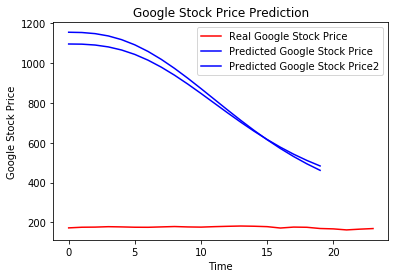

In [65]:
# Visualising the results

plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.plot(predicted_stock_price2, color = 'blue', label = 'Predicted Google Stock Price2')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

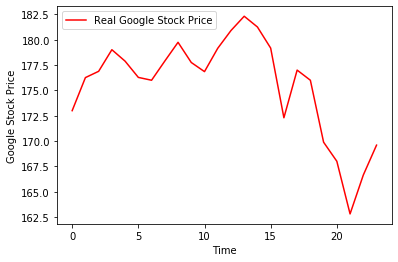

In [67]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()